# TSP Environment

In [1]:
%matplotlib inline

# Rich Traceback
from rich.traceback import install
install(show_locals=True)

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7fa548460310>>

In [2]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict
from typing import Optional

import numpy as np
import torch
import tqdm
from tensordict.nn import TensorDictModule
from tensordict.tensordict import TensorDict, TensorDictBase
from torch import nn

from torchrl.data import BoundedTensorSpec, CompositeSpec, UnboundedContinuousTensorSpec, BinaryDiscreteTensorSpec, UnboundedDiscreteTensorSpec
from torchrl.envs import (
    CatTensors,
    EnvBase,
    Transform,
    TransformedEnv,
    UnsqueezeTransform,
)
from torchrl.envs.transforms.transforms import _apply_to_composite
from torchrl.envs.utils import check_env_specs, step_mdp

import sys; sys.path.append('../../')

# from sanity.tsp import TSPEnv
from notebooks.am.sanity.tsp2 import TSPEnv

### Making the custom environment

Environment `_step`: this defines the state update of the TSP problem gived a TensorDict (`td` in the code) of the current state and the action to take:

### Testing the environment

In [3]:
env = TSPEnv(n_loc=7)

In [4]:
td = env.reset()
for i in range(3):
    td.set("action", torch.tensor([i]))
    print(td['action'])
    td = env.step(td)['next']
    print("visited2", td['visited'])
    td.set("action", torch.tensor([i]))
    td = env.step(td)['next']

tensor([0])
visited2 tensor([[1, 0, 0, 0, 0, 0, 0]], dtype=torch.uint8)
tensor([1])
visited2 tensor([[1, 1, 0, 0, 0, 0, 0]], dtype=torch.uint8)
tensor([2])
visited2 tensor([[1, 1, 1, 0, 0, 0, 0]], dtype=torch.uint8)


### Plotting

In [5]:
rollout = env.rollout(
    50,
    auto_reset=False,  # we're executing the reset out of the ``rollout`` call
    tensordict=env.reset(env.gen_params(batch_size=[512])),
    break_when_any_done=True
)

Batch detected. Plotting the first batch element!


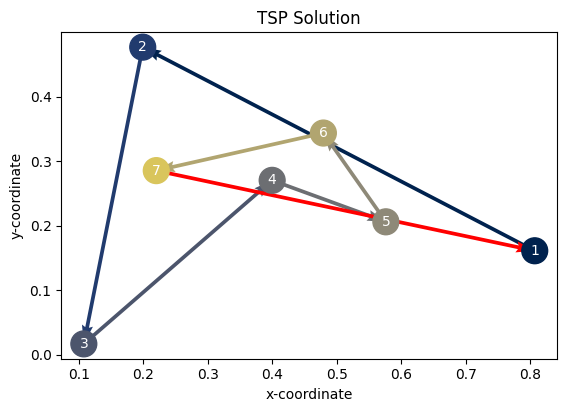

In [6]:
# get greater than -inf reward indexes
last_state = rollout['next'][:, -1]
idx = last_state["done"] == 1
rollout_finished = last_state[idx.squeeze()]

if rollout_finished.batch_size[0] == 0:
    print("No rollout finished")
else:
    env.render(rollout_finished)